In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
test = pd.read_csv('titanic_test.csv')

In [4]:
print(train.isnull())


     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
5          False     False   False  False  False   True  False  False   False   
6          False     False   False  False  False  False  False  False   False   
7          False     False   False  False  False  False  False  False   False   
8          False     False   False  False  False  False  False  False   False   
9          False     False   False  False  False  False  False  False   False   
10         False     False   False  False  False  False  False  False   False   
11         False     False  

### Using a heatmap to visualize the missing values

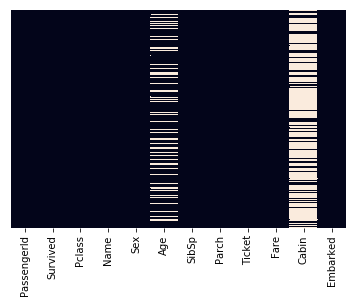

In [5]:
sns.heatmap(data=train.isnull(), yticklabels=False , cbar=False )

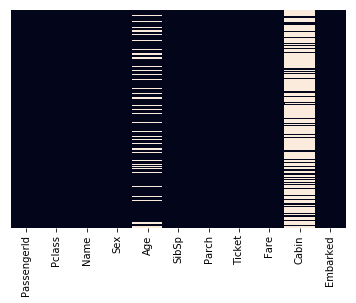

In [6]:
sns.heatmap(data=test.isnull(),  yticklabels=False , cbar=False)

###### Similar missing values for both our test and train data

## EDA Time:

In [7]:
sns.set_style("whitegrid")

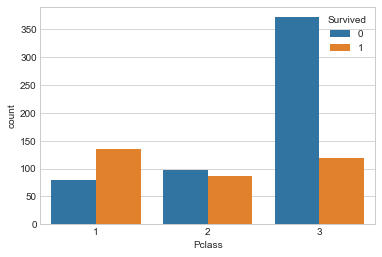

In [8]:
sns.countplot(data=train, x='Pclass', hue='Survived' )

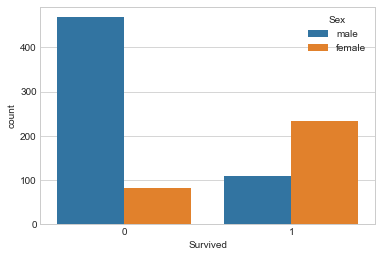

In [9]:
sns.countplot(data=train, x='Survived', hue='Sex' )

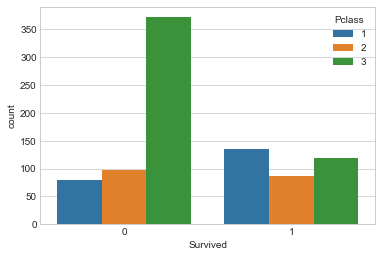

In [10]:
sns.countplot(data=train, x='Survived', hue='Pclass' )

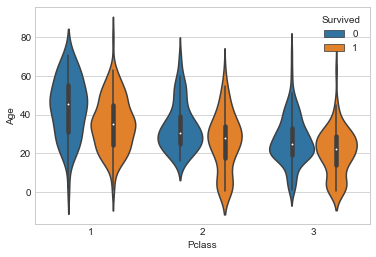

In [11]:
sns.violinplot(data=train, y='Age', x='Pclass', hue='Survived')

#### Interesting to see that in every class, the mean age that survived was slightly lower than non-survivors



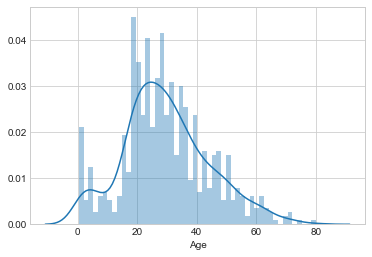

In [12]:
sns.distplot(train['Age'].dropna(), bins=50)

#### interesting to see a Bi-modal distribution , high rate of newborns

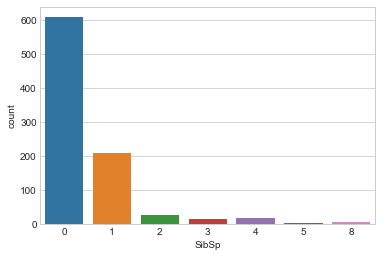

In [13]:
sns.countplot(train['SibSp'])

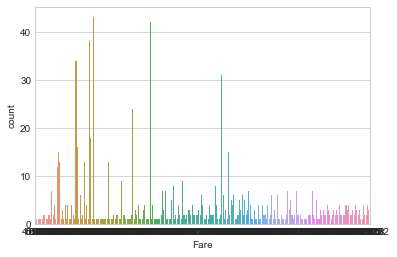

In [14]:
sns.countplot(x='Fare', data=train)

## Cleaning our Data

#### We are missing quite a few age data, we will need to fill them up with average age data. However to be more precise it would be best to fill it the average age for the data of the Pclass 

In [15]:
means = train['Age'].groupby(train['Pclass']).mean()

In [16]:
means_df = pd.DataFrame(means)

In [17]:
means_df

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return float(means_df.loc[1])
        elif Pclass == 2:
            return float(means_df.loc[2])
        else:
            return float(means_df.loc[3])
    else:
        return Age

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

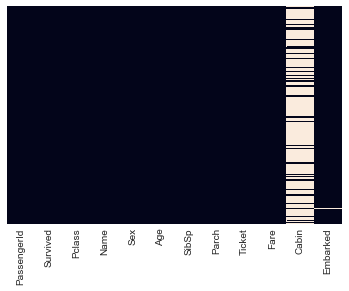

In [20]:
sns.heatmap(data=train.isnull(), yticklabels=False , cbar=False )

#### Perfect, now we see that all the age data has been filled out. Our calculations are better than dropping , or than filling them with the average age of all the passengers. 

In [21]:
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)

In [22]:
test.shape

(418, 11)

In [23]:
train.shape

(891, 12)

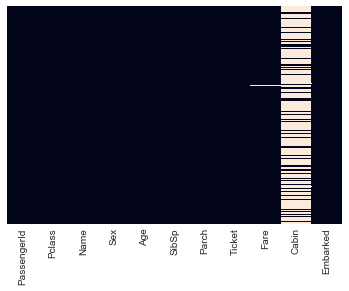

In [24]:
sns.heatmap(data=test.isnull(), yticklabels=False , cbar=False )

#### I will drop the cabin data alltogether, the data is too sparse and will not help with the model later

In [25]:
train.drop('Cabin', axis=1, inplace=True)

In [26]:
test.drop('Cabin', axis=1, inplace=True)

In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [28]:
test.dropna(inplace=True)

In [29]:
train.dropna(inplace=True)

In [30]:
train.dropna(inplace=True)

In [31]:
test.dropna(inplace=True)

In [32]:
train.shape

(889, 11)

In [33]:
test.shape

(417, 10)

#### Now we must start converting our categorical data into dummy columns in preparation for the LogisticRegression Model

In [34]:
train['male']=pd.get_dummies(train['Sex'], drop_first=True)

In [35]:
test['male']=pd.get_dummies(test['Sex'], drop_first=True)

In [36]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [37]:
train = pd.concat([train, embarked], axis=1)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 85.9+ KB


In [39]:
embarked_dummy_test = pd.get_dummies(test['Embarked'], drop_first=True)

In [40]:
test = pd.concat([test, embarked_dummy_test], axis=1)

In [41]:
train.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [42]:
test.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [43]:
train.drop('PassengerId', axis=1, inplace=True)

In [44]:
test.drop('PassengerId', axis=1, inplace=True)

In [45]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


## Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# from sklearn.model_selection import train_test_split

In [48]:
logisticmodel = LogisticRegression()

In [49]:
X=train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

In [50]:
y=train['Survived']

In [51]:
X_test = test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

In [52]:
# y_test = test['Survived']

In [53]:
logisticmodel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
predictions = logisticmodel.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [56]:
from sklearn.metrics import classification_report

#### y_test csv does not have a survived column. We have the predicionts from X_test, but nothing to test against to see the efficiency of out model. 

In [57]:
print(classification_report(y_test, predictions))

NameError: name 'y_test' is not defined

### Future Work: use train_test_split module to split the train data set, this way we can double check the efficiency of our model against some data where the Survived is available. 

